WHY CNN is better than ANN for image recognition and classification tasks

While artificial neural networks (ANNs) can be used for image recognition tasks, convolutional neural networks (CNNs) are generally preferred for such tasks. Here are some reasons why CNNs are more suitable and preferred for image recognition:

1. **Local Connectivity:**
   - CNNs are designed to exploit the spatial locality in images. Convolutional layers use filters that slide across the input image, capturing local patterns. This local connectivity helps CNNs learn hierarchical features in an image.

2. **Parameter Sharing:**
   - CNNs use parameter sharing in convolutional layers, meaning the same set of weights is applied to multiple regions of the input image. This reduces the number of parameters, making the model more efficient and easier to train.

3. **Translation Invariance:**
   - Convolutional layers provide a degree of translation invariance, meaning the model can recognize patterns regardless of their position in the image. This is important for tasks where the spatial arrangement of features is significant.

4. **Pooling Layers:**
   - CNNs often use pooling layers to downsample the spatial dimensions of the input. Pooling helps retain important features while reducing computational complexity and making the network more robust.

5. **Hierarchical Feature Learning:**
   - CNNs naturally learn hierarchical features. Lower layers may capture simple edges or textures, while deeper layers learn more complex and abstract features. This hierarchical learning is crucial for understanding the hierarchical nature of visual information.

6. **Reduced Sensitivity to Variations:**
   - CNNs are less sensitive to variations in pose, lighting, and small deformations. This robustness is essential for handling real-world variations in images.

7. **Weight Sharing:**
   - Weight sharing in convolutional layers allows CNNs to generalize better to different parts of an image or similar patterns in different locations.

8. **3D Input Shape:**
   - Images are three-dimensional (height, width, channels), and CNNs are designed to work with this 3D input shape. They can automatically learn spatial hierarchies and relationships in the data.

9. **Specialized Architectures:**
   - Architectures like AlexNet, VGG, GoogLeNet, and ResNet are designed specifically for image-related tasks. These architectures have proven to be effective for various image recognition challenges.

While ANNs can be applied to image recognition, CNNs are tailored to leverage the inherent structure and characteristics of image data, making them more efficient and effective for tasks like object detection, segmentation, and classification. The use of CNNs has become a standard practice in the field of computer vision.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

i.e. rgb image as 3 channels with 32*32 pixels

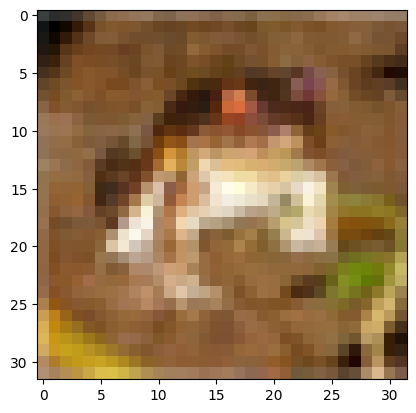

In [5]:
plt.imshow(x_train[0])

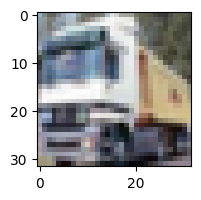

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[0:5] # this is a 2D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)

In [10]:
y_train[:5] # now it is one dimensional array

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
classes[9]

'truck'

In [13]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

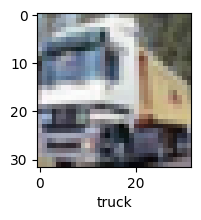

In [14]:
plot_sample(x_train,y_train,1)

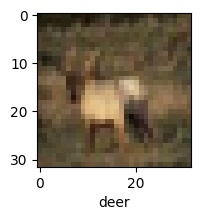

In [15]:
plot_sample(x_train,y_train,3)

In [16]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [17]:
x_train[0]/255  # power of numpy array

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
x_train = x_train/255
x_test = x_test/255

In [19]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), # first layer : input/flatten layer
    layers.Dense(3000,activation='relu'), # 2nd : first hidden layer
    layers.Dense(1000,activation='relu'), # 3rd : 2nd hidden layer
    layers.Dense(10, activation='sigmoid') # binary me 1, baki 3 ke 3, 10 classes ke 10
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5) # very low accuracy on training samples
# ann is performing very bad on image recognition tasts

Epoch 1/5
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8098 - accuracy: 0.3553
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6222 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5428 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4822 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4329 - accuracy: 0.4959


Just 49 % accuracy. with 5 epochs

Classification report

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(elements) for elements in y_pred]

print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.34      0.45      1000
           1       0.73      0.39      0.51      1000
           2       0.44      0.27      0.33      1000
           3       0.27      0.60      0.37      1000
           4       0.54      0.29      0.38      1000
           5       0.55      0.10      0.17      1000
           6       0.51      0.54      0.52      1000
           7       0.67      0.42      0.52      1000
           8       0.33      0.88      0.47      1000
           9       0.50      0.51      0.50      1000

    accuracy                           0.43     10000
   macro avg       0.52      0.43      0.42     10000
weighted avg       0.52      0.43      0.42     10000



just 43 % accuracy

Classification layers ke upar CNN layers daldo

In [26]:
cnn = models.Sequential([

    # cnn : detecting the features in the image : first convolutiona and pooling layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),  # cnn will automatically figure out the filters. You only need to tell filter size and number of filters you want
    layers.MaxPooling2D((2,2)),

    # another set of convolution and pooling layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),  # cnn will automatically figure out the filters. You only need to tell filter size and number of filters you want
    layers.MaxPooling2D((2,2)),

    # dense or ANN layers, except the input layer, jo cnn ko de diya, rest are copy pasted from ann layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # we are using sofmax, sigmoid ke result ko actual probability ke form me normalize krke deta hai, like sigmoid 72,46 deta to softmax: 76/(76+42) = 64, and 42/118 = 36 . ese deta hai softmax. Normalize krke

])

In [24]:
cnn.compile(
    optimizer='SGD', # best is adam, upar vale se compare krna hai so sgd liya
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 7ms/step - loss: 2.0475 - accuracy: 0.2562
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6734 - accuracy: 0.4006
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4754 - accuracy: 0.4714
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3782 - accuracy: 0.5099
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3074 - accuracy: 0.5364
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2534 - accuracy: 0.5587
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1995 - accuracy: 0.5785
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1542 - accuracy: 0.5935
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1109 - accuracy: 0.6092
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0

so ~ 5 % better accuracy, but ye jyada hoti, as ann ke comparison me dense layers we have decreases. so 10-20% ore accracy milti, let's do with adam, to compansate the decrease in dense layers

In [27]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.5297 - accuracy: 0.4480
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1994 - accuracy: 0.5784
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0617 - accuracy: 0.6272
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9788 - accuracy: 0.6583
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9183 - accuracy: 0.6805
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8718 - accuracy: 0.6977
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8387 - accuracy: 0.7088
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8043 - accuracy: 0.7210
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7672 - accuracy: 0.7332
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.740

here after 5 epochs, 70 % accuracy. +25

In [29]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9031 - accuracy: 0.6951


[0.9030779004096985, 0.6951000094413757]

70 %

In [30]:
y_test = y_test.reshape(-1,) # 2D to 1D array conversion
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

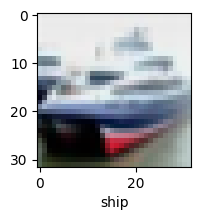

In [31]:
plot_sample(x_test,y_test,1)

In [32]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [33]:
y_pred[:5]

array([[9.7093042e-03, 1.6335173e-03, 1.5505521e-03, 8.1659752e-01,
        2.7720591e-03, 8.9252815e-02, 2.1667687e-02, 1.4368675e-03,
        4.3209158e-02, 1.2170481e-02],
       [7.0102408e-04, 3.7169363e-02, 3.2280582e-06, 1.2035913e-07,
        2.3154263e-08, 2.9057066e-09, 1.8798245e-07, 9.8194777e-09,
        9.4859415e-01, 1.3531911e-02],
       [4.0050495e-01, 1.5045823e-01, 9.5895827e-03, 7.4598221e-03,
        5.6455946e-03, 7.0616923e-04, 3.4289549e-03, 5.5327150e-03,
        4.0171710e-01, 1.4956905e-02],
       [9.7730929e-01, 3.3230268e-04, 4.2387000e-03, 1.0676974e-05,
        2.5112834e-03, 3.4660198e-07, 2.1119713e-05, 1.0745644e-06,
        1.5570334e-02, 4.9171044e-06],
       [6.0635619e-05, 2.9465496e-05, 6.5754697e-02, 2.7319336e-01,
        3.7685510e-02, 2.2389058e-02, 6.0083997e-01, 1.8206878e-05,
        2.5829211e-05, 3.2514999e-06]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]

In [37]:
y_classes[:5] # first 5 me all correct aaya

[3, 8, 8, 0, 6]

In [38]:
classes[y_classes[1]]

'ship'

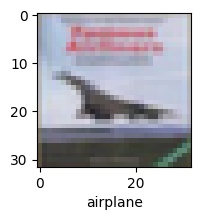

In [39]:
plot_sample(x_test,y_test,3)

Even for us, veryy difficult to identify these images

In [40]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.80      0.83      0.82      1000
           2       0.73      0.44      0.55      1000
           3       0.51      0.57      0.54      1000
           4       0.68      0.57      0.62      1000
           5       0.59      0.59      0.59      1000
           6       0.65      0.85      0.74      1000
           7       0.75      0.75      0.75      1000
           8       0.82      0.79      0.80      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



f1 score for all clasees, is good

In [43]:
# by default padding = valid => no padding
# padding is a way to capture full image.
# No padding se corner and edges pixels are not considered in the same way as all other pixels.
# stride = (1,1) or (2,2) or anything : just to tell ki kitne rows and column are to be skipped or to be moved by how many pixels : v
# video 25 dekho smjh aayega
# valid padding = no padding = pixels on the corner don't get to play important role in feature detection = default setting in layers.Conv2D()
# (m'-f+1)*(n'-f+1) = m*n , k/a same convolution or padding s.t. output same as input
# layers.Con2D(16, 3, padding='same', activation='relu')
# layers.Conv2D(filters,kernel_size, strides=(1,1),padding='valid',data_format=None)